In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Updated data for the reference implementation (blue bars)
# Updated data for the reference implementation (blue bars) with new time data
avg_sq_err_lsv = np.array([0.000202, 0.000199, 0.000199])
min_sq_err_lsv = np.array([0.000191, 0.000191, 0.000184])
max_sq_err_lsv = np.array([0.000212, 0.000214, 0.000207])

avg_sq_err_rsv = np.array([0.002016, 0.001988, 0.001986])
min_sq_err_rsv = np.array([0.001908, 0.001912, 0.001844])
max_sq_err_rsv = np.array([0.002124, 0.002136, 0.002068])

avg_berr = np.array([1.962129e-15, 2.249767e-15, 3.247327e-15])
min_berr = np.array([1.902805e-15, 1.719740e-15, 1.747732e-15])
max_berr = np.array([2.011919e-15, 6.569151e-15, 9.944468e-15])

avg_max_orth_err = np.array([3.252764e-16, 3.337405e-16, 3.401190e-16])
min_max_orth_err = np.array([3.233037e-16, 3.316292e-16, 3.375857e-16])
max_max_orth_err = np.array([3.272360e-16, 3.359000e-16, 3.416235e-16])

avg_backward_err = np.array([5.713937e-15, 5.651923e-15, 5.810927e-15])
min_backward_err = np.array([5.505162e-15, 5.378863e-15, 5.636024e-15])
max_backward_err = np.array([6.062462e-15, 6.070258e-15, 6.249629e-15])

avg_iterations = [5.0, 5.0, 5.0]
min_iterations = [5.0, 5.0, 5.0]
max_iterations = [5.0, 5.0, 5.0]

# Updated time data for blue bars with error bars
elapsed_time_blue = [294.833756, 594.913598, 952.195055]
elapsed_time_blue_min = [26.282605, 26.808802, 28.903387]
elapsed_time_blue_max = [30.934050, 31.460155, 39.958155]
elapsed_time_blue_avg = np.mean([elapsed_time_blue_min, elapsed_time_blue_max], axis=0)

condition_numbers_log = [3, 6, 9]

log_avg_sq_err_lsv = np.log10(avg_sq_err_lsv)
log_min_sq_err_lsv = np.log10(min_sq_err_lsv)
log_max_sq_err_lsv = np.log10(max_sq_err_lsv)

log_avg_sq_err_rsv = np.log10(avg_sq_err_rsv)
log_min_sq_err_rsv = np.log10(min_sq_err_rsv)
log_max_sq_err_rsv = np.log10(max_sq_err_rsv)

log_avg_berr = np.log10(avg_berr)
log_min_berr = np.log10(min_berr)
log_max_berr = np.log10(max_berr)

log_avg_max_orth_err = np.log10(avg_max_orth_err)
log_min_max_orth_err = np.log10(min_max_orth_err)
log_max_max_orth_err = np.log10(max_max_orth_err)

log_avg_backward_err = np.log10(avg_backward_err)
log_min_backward_err = np.log10(min_backward_err)
log_max_backward_err = np.log10(max_backward_err)

# Updated data for the current implementation (green bars) with new time data
new_avg_sq_err_lsv = np.array([0.000201, 0.000199, 0.000202])
new_min_sq_err_lsv = np.array([0.000194, 0.000192, 0.000190])
new_max_sq_err_lsv = np.array([0.000207, 0.000207, 0.000207])

new_avg_sq_err_rsv = np.array([0.002005, 0.001994, 0.002018])
new_min_sq_err_rsv = np.array([0.001940, 0.001920, 0.001904])
new_max_sq_err_rsv = np.array([0.002068, 0.002072, 0.002072])

new_avg_berr = np.array([2.276147e-15, 2.175404e-15, 2.154215e-15])
new_min_berr = np.array([2.236037e-15, 2.116220e-15, 2.053408e-15])
new_max_berr = np.array([2.331118e-15, 2.311886e-15, 2.258389e-15])

new_avg_max_orth_err = np.array([1.422713e-15, 1.481226e-15, 1.535276e-15])
new_min_max_orth_err = np.array([1.401877e-15, 1.466298e-15, 1.513598e-15])
new_max_max_orth_err = np.array([1.440901e-15, 1.494049e-15, 1.547512e-15])

new_avg_backward_err = np.array([1.747701e-12, 2.115929e-12, 3.405713e-12])
new_min_backward_err = np.array([1.200427e-13, 3.906719e-13, 5.725020e-13])
new_max_backward_err = np.array([1.126752e-11, 8.702195e-12, 8.513600e-12])

new_avg_iterations = [5.0, 5.0, 5.0]
new_min_iterations = [5.0, 5.0, 5.0]
new_max_iterations = [5.0, 5.0, 5.0]

# Updated time data for green bars with error bars
elapsed_time_green = [450.511976, 935.219146, 1342.192171]
elapsed_time_green_min = [42.099561, 46.034856, 32.548535]
elapsed_time_green_max = [49.485718, 50.811207, 48.406186]
elapsed_time_green_avg = np.mean([elapsed_time_green_min, elapsed_time_green_max], axis=0)

batches_processed = [1, 2, 3]
indices = np.arange(len(condition_numbers_log))  # the label locations


In [12]:
def plot_side_by_side(ax, x, y1_mean, y1_err, y2_mean, y2_err, label1, label2):
    # Plot the error bars for y1
    ax.errorbar(x - 0.1, y1_mean, yerr=y1_err, fmt='o', capsize=5, label=label1, color='blue')

    # Plot the error bars for y2
    ax.errorbar(x + 0.1, y2_mean, yerr=y2_err, fmt='o', capsize=5, label=label2, color='green')

    # Set xticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(x)

    # Add legend
    ax.legend()

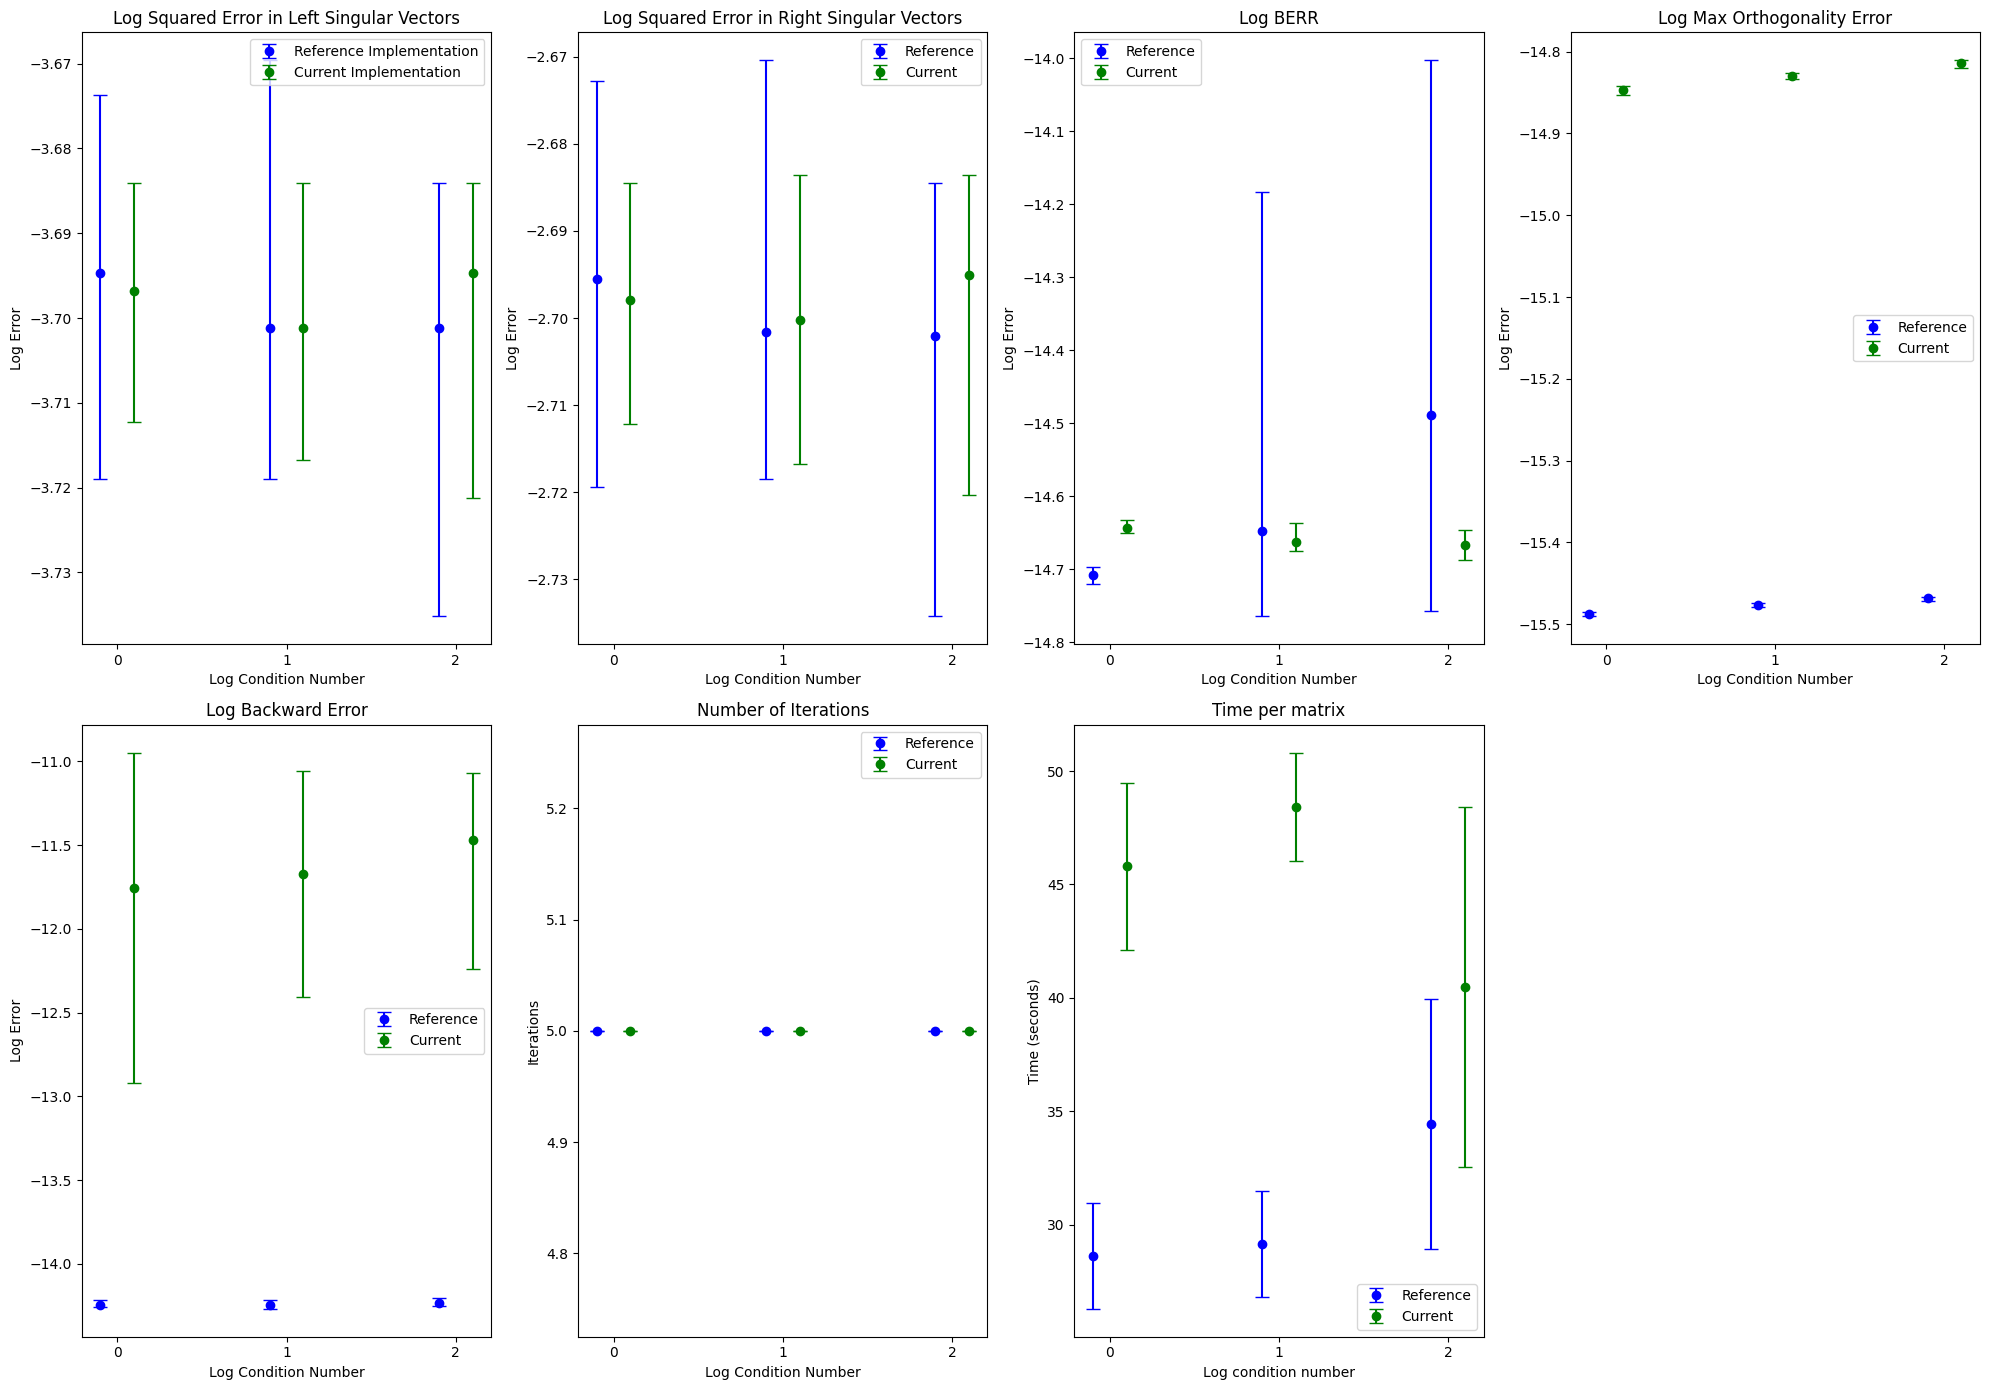

In [13]:
# Create subplots with an additional plot for number of iterations and elapsed time
fig, axs = plt.subplots(2, 4, figsize=(20, 14))



# Plotting with error bars in logarithmic scale (excluding singular values errors)
plot_side_by_side(axs[0, 0], indices, np.log10(avg_sq_err_lsv), [np.subtract(np.log10(avg_sq_err_lsv), np.log10(min_sq_err_lsv)), np.subtract(np.log10(max_sq_err_lsv), np.log10(avg_sq_err_lsv))], 
                  np.log10(new_avg_sq_err_lsv), [np.subtract(np.log10(new_avg_sq_err_lsv), np.log10(new_min_sq_err_lsv)), np.subtract(np.log10(new_max_sq_err_lsv), np.log10(new_avg_sq_err_lsv))],
                  'Reference', 'Current')
axs[0, 0].set_title('Log Squared Error in Left Singular Vectors')
axs[0, 0].set_ylabel('Log Error')
axs[0, 0].set_xlabel('Log Condition Number')
axs[0, 0].legend()

plot_side_by_side(axs[0, 1], indices, np.log10(avg_sq_err_rsv), [np.subtract(np.log10(avg_sq_err_rsv), np.log10(min_sq_err_rsv)), np.subtract(np.log10(max_sq_err_rsv), np.log10(avg_sq_err_rsv))], 
                  np.log10(new_avg_sq_err_rsv), [np.subtract(np.log10(new_avg_sq_err_rsv), np.log10(new_min_sq_err_rsv)), np.subtract(np.log10(new_max_sq_err_rsv), np.log10(new_avg_sq_err_rsv))],
                  'Reference', 'Current')
axs[0, 1].set_title('Log Squared Error in Right Singular Vectors')
axs[0, 1].set_ylabel('Log Error')
axs[0, 1].set_xlabel('Log Condition Number')
axs[0, 1].legend()

plot_side_by_side(axs[0, 2], indices, np.log10(avg_berr), [np.subtract(np.log10(avg_berr), np.log10(min_berr)), np.subtract(np.log10(max_berr), np.log10(avg_berr))], 
                  np.log10(new_avg_berr), [np.subtract(np.log10(new_avg_berr), np.log10(new_min_berr)), np.subtract(np.log10(new_max_berr), np.log10(new_avg_berr))],
                  'Reference', 'Current')
axs[0, 2].set_title('Log BERR')
axs[0, 2].set_ylabel('Log Error')
axs[0, 2].set_xlabel('Log Condition Number')
axs[0, 2].legend()

plot_side_by_side(axs[0, 3], indices, np.log10(avg_max_orth_err), [np.subtract(np.log10(avg_max_orth_err), np.log10(min_max_orth_err)), np.subtract(np.log10(max_max_orth_err), np.log10(avg_max_orth_err))], 
                  np.log10(new_avg_max_orth_err), [np.subtract(np.log10(new_avg_max_orth_err), np.log10(new_min_max_orth_err)), np.subtract(np.log10(new_max_max_orth_err), np.log10(new_avg_max_orth_err))],
                  'Reference', 'Current')
axs[0, 3].set_title('Log Max Orthogonality Error')
axs[0, 3].set_ylabel('Log Error')
axs[0, 3].set_xlabel('Log Condition Number')
axs[0, 3].legend()

plot_side_by_side(axs[1, 0], indices, np.log10(avg_backward_err), [np.subtract(np.log10(avg_backward_err), np.log10(min_backward_err)), np.subtract(np.log10(max_backward_err), np.log10(avg_backward_err))], 
                  np.log10(new_avg_backward_err), [np.subtract(np.log10(new_avg_backward_err), np.log10(new_min_backward_err)), np.subtract(np.log10(new_max_backward_err), np.log10(new_avg_backward_err))],
                  'Reference', 'Current')
axs[1, 0].set_title('Log Backward Error')
axs[1, 0].set_ylabel('Log Error')
axs[1, 0].set_xlabel('Log Condition Number')
axs[1, 0].legend()

# Plotting number of iterations without log
plot_side_by_side(axs[1, 1], indices, avg_iterations, [np.subtract(avg_iterations, min_iterations), np.subtract(max_iterations, avg_iterations)], 
                  new_avg_iterations, [np.subtract(new_avg_iterations, new_min_iterations), np.subtract(new_max_iterations, new_avg_iterations)],
                  'Reference', 'Current')
axs[1, 1].set_title('Number of Iterations')
axs[1, 1].set_ylabel('Iterations')
axs[1, 1].set_xlabel('Log Condition Number')
axs[1, 1].legend()

# # Plotting elapsed time
# axs[1, 2].plot(batches_processed, elapsed_time_green, 'go-', label='Current Implementation')
# axs[1, 2].plot(batches_processed, elapsed_time_blue, 'bo-', label='Reference Implementation')
# axs[1, 2].set_title('Total Elapsed Time')
# axs[1, 2].set_ylabel('Time (seconds)')
# axs[1, 2].set_xlabel('Number of batches processed')
# axs[1, 2].legend()
elapsed_time_blue_err = [np.subtract(elapsed_time_blue_avg, elapsed_time_blue_min), np.subtract(elapsed_time_blue_max, elapsed_time_blue_avg)]
elapsed_time_green_err = [np.subtract(elapsed_time_green_avg, elapsed_time_green_min), np.subtract(elapsed_time_green_max, elapsed_time_green_avg)]

plot_side_by_side(axs[1, 2], indices, elapsed_time_blue_avg, elapsed_time_blue_err, elapsed_time_green_avg, elapsed_time_green_err, 'Reference', 'Current')
axs[1, 2].set_title('Time per matrix')
axs[1, 2].set_ylabel('Time (seconds)')
axs[1, 2].set_xlabel('Log condition number')
axs[1, 2].legend()
fig.delaxes(axs[1, 3])

# Add legend
axs[0, 0].legend(['Reference Implementation', 'Current Implementation'], loc='upper right')

plt.tight_layout()
plt.savefig('./figures/metrics_5_matrices_10k_1k_no_cumulative.png', format='png', dpi=300)
plt.show()
